<!-- File automatically generated using DocOnce (https://github.com/doconce/doconce/):
doconce format ipynb poisson.do.txt  -->

# Demo - 1D Poisson's equation
**Mikael Mortensen** (email: `mikaem@math.uio.no`), Department of Mathematics, University of Oslo.

Date: **April 13, 2018**

**Summary.** This is a demonstration of how the Python module [shenfun](https://github.com/spectralDNS/shenfun) can be used to solve Poisson's
equation with Dirichlet boundary conditions in one dimension. Spectral convergence, as
shown in the figure below, is demonstrated.
The demo is implemented in slightly more generic terms (more boundary conditions)
in [poisson1D.py](https://github.com/spectralDNS/shenfun/blob/master/demo/poisson1D.py), and
the numerical method is is described in more detail by J. Shen [shen1](#shen1) and [shen95](#shen95).

<!-- dom:FIGURE: [https://rawgit.com/spectralDNS/spectralutilities/master/figures/poisson1D_errornorm.png] Convergence of 1D Poisson solvers for both Legendre and Chebyshev modified basis function. <a id="fig:ct0"></a> -->
<!-- begin figure -->
<a id="fig:ct0"></a>

<img src="https://rawgit.com/spectralDNS/spectralutilities/master/figures/poisson1D_errornorm.png" ><p style="font-size: 0.9em"><i>Figure 1: Convergence of 1D Poisson solvers for both Legendre and Chebyshev modified basis function.</i></p>
<!-- end figure -->

## Poisson's equation

Poisson's equation is given as

<!-- Equation labels as ordinary links -->
<a id="eq:poisson"></a>

$$
\begin{equation}
\nabla^2 u(x) = f(x) \quad \text{for }\, x \in (-1, 1), \label{eq:poisson} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto1"></a>

$$
\begin{equation}  
u(-1)=a, u(1)=b, \notag
\label{_auto1} \tag{2}
\end{equation}
$$

where $u(x)$ is the solution, $f(x)$ is a function and $a, b$ are two possibly
non-zero constants.

To solve Eq. ([1](#eq:poisson)) with the Galerkin method we need smooth continuously
differentiable basis functions, $v_k$, that satisfy the given boundary conditions.
And then we look for solutions like

<!-- Equation labels as ordinary links -->
<a id="eq:u"></a>

$$
\begin{equation}
u(x) = \sum_{k=0}^{N-1} \hat{u}_k v_k(x), \label{eq:u} \tag{3}
\end{equation}
$$

where $N$ is the size of the discretized problem,
$\{\hat{u}_k\}_{k=0}^{N-1}$ are the unknown expansion
coefficients, and the function space is $\text{span}\{v_k\}_{k=0}^{N-1}$.

The basis functions of the function space can, for example,  be constructed from
[Chebyshev](https://en.wikipedia.org/wiki/Chebyshev_polynomials), $T_k(x)$, or
[Legendre](https://en.wikipedia.org/wiki/Legendre_polynomials), $L_k(x)$, polynomials
and we use the common notation $\phi_k(x)$ to represent either one of them. It turns out that
it is easiest to use basis functions with homogeneous Dirichlet boundary conditions

<!-- Equation labels as ordinary links -->
<a id="_auto2"></a>

$$
\begin{equation}
v_k(x) = \phi_k(x) - \phi_{k+2}(x),
\label{_auto2} \tag{4}
\end{equation}
$$

for $k=0, 1, \ldots N-3$. This gives the function space
$V^N_0 = \text{span}\{v_k(x)\}_{k=0}^{N-3}$.
We can then add two more linear basis functions (that belong to the kernel of Poisson's equation)

<!-- Equation labels as ordinary links -->
<a id="_auto3"></a>

$$
\begin{equation}
v_{N-2} = \frac{1}{2}(\phi_0 - \phi_1), 
\label{_auto3} \tag{5}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto4"></a>

$$
\begin{equation}  
v_{N-1} = \frac{1}{2}(\phi_0 + \phi_1).
\label{_auto4} \tag{6}
\end{equation}
$$

which gives the inhomogeneous space $V^N = \text{span}\{v_k\}_{k=0}^{N-1}$.
With the two linear basis functions it is easy to see that the last two degrees
of freedom, $\hat{u}_{N-2}$ and $\hat{u}_{N-1}$, now are given as

<!-- Equation labels as ordinary links -->
<a id="eq:dirichleta"></a>

$$
\begin{equation}
u(-1) = \sum_{k=0}^{N-1} \hat{u}_k v_k(-1) = \hat{u}_{N-2} = a,
\label{eq:dirichleta} \tag{7} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:dirichletb"></a>

$$
\begin{equation}  
u(+1) = \sum_{k=0}^{N-1} \hat{u}_k v_k(+1) = \hat{u}_{N-1} = b,
\label{eq:dirichletb} \tag{8}
\end{equation}
$$

and, as such, we only have to solve for $\{\hat{u}_k\}_{k=0}^{N-3}$, just like
for a problem with homogeneous boundary conditions (for homogeneous boundary condition
we simply have $\hat{u}_{N-2} = \hat{u}_{N-1} = 0$).
We now formulate a variational problem using the Galerkin method: Find $u \in V^N$ such that

<!-- Equation labels as ordinary links -->
<a id="eq:varform"></a>

$$
\begin{equation}
\int_{-1}^1 \nabla^2 u \, v \, w\, dx = \int_{-1}^1 f \, v\, w\, dx \quad \forall v \, \in \, V^N_0. \label{eq:varform} \tag{9}
\end{equation}
$$

Note that since we only have $N-3$ unknowns we are only using the homogeneous test
functions from $V^N_0$.

The weighted integrals, weighted by $w(x)$, are called inner products, and a
common notation is

<!-- Equation labels as ordinary links -->
<a id="_auto5"></a>

$$
\begin{equation}
\int_{-1}^1 u \, v \, w\, dx = \left( u, v\right)_w.
\label{_auto5} \tag{10}
\end{equation}
$$

The integral can either be computed exactly, or with quadrature. The advantage
of the latter is that it is generally faster, and that non-linear terms may be
computed just as quickly as linear. For a linear problem, it does not make much
of a difference, if any at all. Approximating the integral with quadrature, we
obtain

$$
\begin{align*}
\int_{-1}^1 u \, v \, w\, dx &\approx \left( u, v \right)_w^N, \\ 
&\approx \sum_{j=0}^{N-1} u(x_j) v(x_j) w_j,
\end{align*}
$$

where $\{w_j\}_{j=0}^{N-1}$ are quadrature weights.
The quadrature points $\{x_j\}_{j=0}^{N-1}$
are specific to the chosen basis, and even within basis there are two different
choices based on which quadrature rule is selected, either Gauss or Gauss-Lobatto.

Inserting for test and trialfunctions, we get the following bilinear form and
matrix $A=(a_{jk})\in\mathbb{R}^{N-2\times N-2}$ for the Laplacian

$$
\begin{align*}
\left( \nabla^2u, v \right)_w^N &= \left( \nabla^2\sum_{k=0}^{N-3}\hat{u}_k v_{k}, v_j \right)_w^N, \quad j=0,1,\ldots, N-3\\ 
    &= \sum_{k=0}^{N-3}\left(\nabla^2 v_{k}, v_j \right)_w^N \hat{u}_k, \\ 
    &= \sum_{k=0}^{N-3}a_{jk} \hat{u}_k.
\end{align*}
$$

Note that the sum runs over $k=0, 1, \ldots, N-3$ since
the second derivatives of $v_{N-2}$ and $v_{N-1}$ are zero.
The right hand side linear form and vector is computed as $\tilde{f}_j = (f,
v_j)_w^N$, for $j=0,1,\ldots, N-3$, where a tilde is used because this is not
a complete transform of the function $f$, but only an inner product.

By defining the column vectors $\boldsymbol{\hat{u}}=(\hat{u}_0, \hat{u}_1, \ldots, \hat{u}_{N-3})^T$
and $\boldsymbol{\tilde{f}}=(\tilde{f}_0, \tilde{f}_1, \ldots, \tilde{f}_{N-3})^T$
we get the linear system of equations

<!-- Equation labels as ordinary links -->
<a id="_auto6"></a>

$$
\begin{equation}
A \hat{\boldsymbol{u}} = \tilde{\boldsymbol{f}}.
\label{_auto6} \tag{11}
\end{equation}
$$

Now, when the expansion coefficients $\boldsymbol{\hat{u}}$ are found by
solving this linear system, they may be
transformed to real space $u(x)$ using ([3](#eq:u)), and here the contributions
from $\hat{u}_{N-2}$ and $\hat{u}_{N-1}$ must be accounted for. Note that the matrix
$A$ (different for Legendre or Chebyshev) has a very special structure that
allows for a solution to be found very efficiently in order of $\mathcal{O}(N)$
operations, see [[shen1]](#shen1) and [[shen95]](#shen95). These solvers are implemented in
shenfun for both bases.

## Method of manufactured solutions

In this demo we will use the method of manufactured
solutions to demonstrate spectral accuracy of the `shenfun` Dirichlet bases. To
this end we choose an analytical function that satisfies the given boundary
conditions:

<!-- Equation labels as ordinary links -->
<a id="eq:u_e"></a>

$$
\begin{equation}
u_e(x) = \sin(k\pi x)(1-x^2) + a(1-x)/2 + b(1+x)/2, \label{eq:u_e} \tag{12}
\end{equation}
$$

where $k$ is an integer and $a$ and $b$ are constants. Now, feeding $u_e$ through
the Laplace operator, we see that the last two linear terms disappear, whereas the
first term results in

<!-- Equation labels as ordinary links -->
<a id="_auto7"></a>

$$
\begin{equation}
 \nabla^2 u_e(x) = \frac{d^2 u_e}{dx^2},  
\label{_auto7} \tag{13}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:solution"></a>

$$
\begin{equation}  
                  = -4k \pi x \cos(k\pi x) - 2\sin(k\pi x) - k^2 \pi^2 (1 -
x^2) \sin(k \pi x). \label{eq:solution} \tag{14}
\end{equation}
$$

Now, setting $f_e(x) = \nabla^2 u_e(x)$ and solving for $\nabla^2 u(x) = f_e(x)$,
we can compare the numerical solution $u(x)$ with the analytical solution $u_e(x)$
and compute error norms.

## Implementation

### Preamble

We will solve Poisson's equation using the [shenfun](https://github.com/spectralDNS/shenfun) Python module. The first thing needed
is then to import some of this module's functionality
plus some other helper modules, like [Numpy](https://numpy.org) and [Sympy](https://sympy.org):

In [1]:
from shenfun import inner, div, grad, TestFunction, TrialFunction, Function, \
    project, Dx, Array, FunctionSpace, dx
import numpy as np
from sympy import symbols, cos, sin, exp, lambdify

We use `Sympy` for the manufactured solution and `Numpy` for testing.

### Manufactured solution

The exact solution $u_e(x)$ and the right hand side $f_e(x)$ are created using
`Sympy` as follows

In [2]:
a = -1
b = 1
k = 4
x = symbols("x")
ue = sin(k*np.pi*x)*(1-x**2) + a*(1 - x)/2. + b*(1 + x)/2.
fe = ue.diff(x, 2)

These solutions are now valid for a continuous domain. The next step is thus to
discretize, using a discrete mesh $\{x_j\}_{j=0}^{N-1}$ and a finite number of
basis functions.

Note that it is not mandatory to use `Sympy` for the manufactured solution. Since the
solution is known ([14](#eq:solution)), we could just as well simply use `Numpy`
to compute $f_e$ at $\{x_j\}_{j=0}^{N-1}$. However, with `Sympy` it is much
easier to experiment and quickly change the solution.

### Discretization

We create a basis with a given number of basis functions, and extract the computational
mesh from the basis itself

In [3]:
N = 32
SD = FunctionSpace(N, 'Chebyshev', bc=(a, b))
#SD = FunctionSpace(N, 'Legendre', bc=(a, b))

Note that we can either choose a Legendre or a Chebyshev basis.

### Variational formulation

The variational problem ([9](#eq:varform)) can be assembled using `shenfun`'s
[TrialFunction](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.arguments.TrialFunction), [TestFunction](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.arguments.TestFunction) and [inner()](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.inner.inner) functions.

In [4]:
u = TrialFunction(SD)
v = TestFunction(SD)
# Assemble left hand side matrix
A = inner(v, div(grad(u)))
# Assemble right hand side
fj = Array(SD, buffer=fe)
f_hat = Function(SD)
f_hat = inner(v, fj, output_array=f_hat)

Note that the `sympy` function `fe` can be used to initialize the [Array](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.arguments.Array)
`fj`. We wrap this Numpy array in an [Array](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.arguments.Array) class
(`fj = Array(SD, buffer=fe)`), because an Array
is required as input to the [inner()](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.inner.inner) function.

### Solve linear equations

Finally, solve linear equation system and transform solution from spectral
$\boldsymbol{\hat{u}}$ vector to the real space $\{u(x_j)\}_{j=0}^{N-1}$
and then check how the solution corresponds with the exact solution $u_e$.
To this end we compute the $L_2$-errornorm using the `shenfun` function
[dx()](https://shenfun.readthedocs.io/en/latest/shenfun.utilities.html#shenfun.utilities.dx)

In [5]:
u_hat = A.solve(f_hat)
uj = SD.backward(u_hat)
ua = Array(SD, buffer=ue)
print("Error=%2.16e" %(np.sqrt(dx((uj-ua)**2))))

Error=2.3565371191241489e-10


### Convergence test

To do a convergence test we will now create a function `main`, that takes the
number of quadrature points as parameter, and prints out
the error.

In [6]:
def main(N, family='Chebyshev'):
    SD = FunctionSpace(N, family=family, bc=(a, b))
    u = TrialFunction(SD)
    v = TestFunction(SD)

    # Get f on quad points
    fj = Array(SD, buffer=fe)

    # Compute right hand side of Poisson's equation
    f_hat = Function(SD)
    f_hat = inner(v, fj, output_array=f_hat)

    # Get left hand side of Poisson's equation
    A = inner(v, div(grad(u)))

    f_hat = A.solve(f_hat)
    uj = SD.backward(f_hat)

    # Compare with analytical solution
    ua = Array(SD, buffer=ue)
    l2_error = np.linalg.norm(uj-ua)
    return l2_error

For example, we find the error of a Chebyshev discretization
using 12 quadrature points as

In [7]:
main(12, 'Chebyshev')

1.1654916318123927

To get the convergence we call `main` for a list
of $N=[12, 16, \ldots, 48]$, and collect the errornorms in
arrays to be plotted. The error can be plotted using
[matplotlib](https://matplotlib.org), and the generated
figure is also shown in this demos summary.

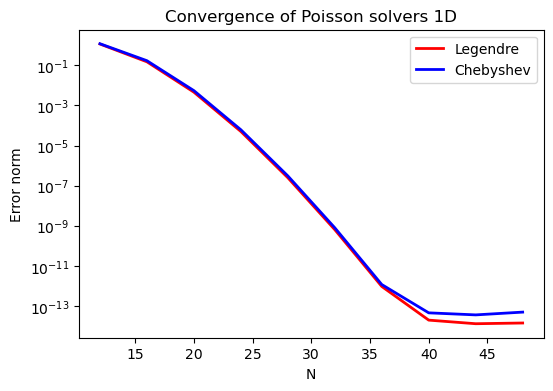

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(12, 50, 4)
error = {}
for basis in ('legendre', 'chebyshev'):
    error[basis] = []
    for i in range(len(N)):
        errN = main(N[i], basis)
        error[basis].append(errN)

plt.figure(figsize=(6, 4))
for basis, col in zip(('legendre', 'chebyshev'), ('r', 'b')):
    plt.semilogy(N, error[basis], col, linewidth=2)
plt.title('Convergence of Poisson solvers 1D')
plt.xlabel('N')
plt.ylabel('Error norm')
plt.legend(('Legendre', 'Chebyshev'))
plt.show()

The spectral convergence is evident and we can see that
after $N=40$ roundoff errors dominate as the errornorm trails off around $10^{-14}$.

## Complete solver
<a id="sec:complete"></a>

A complete solver, that can use any family of bases (Chebyshev, Legendre, Jacobi, Chebyshev second kind),
and any kind of boundary condition, can be found [here](https://github.com/spectralDNS/shenfun/blob/master/demo/poisson1D.py).

<!-- ======= Bibliography ======= -->

1. <a id="shen1"></a> **J. Shen**.  Efficient Spectral-Galerkin Method I. Direct Solvers of Second- and Fourth-Order Equations Using Legendre Polynomials, *SIAM Journal on Scientific Computing*, 15(6), pp. 1489-1505, [doi: 10.1137/0915089](https://dx.doi.org/10.1137/0915089), 1994.

2. <a id="shen95"></a> **J. Shen**.  Efficient Spectral-Galerkin Method II. Direct Solvers of Second- and Fourth-Order Equations Using Chebyshev Polynomials, *SIAM Journal on Scientific Computing*, 16(1), pp. 74-87, [doi: 10.1137/0916006](https://dx.doi.org/10.1137/0916006), 1995.